## Transports of water along several cross-sections when diffusivity changes

Transports across several cross sections in the domain (See plot further down)

Water transport calculated as $\Phi_w = \vec{u}\cdot\vec{a}$

| Run |  $Kv_{can}$ ($m^2s^{-1}$)   | $Kv_{out}$ ($m^2s^{-1}$)        |
|-----| :---------------------: |:-------------|
| 03  | $10^{-5}$ |  $10^{-5}$ |
| 11  | $10^{-4}$ |  $10^{-4}$ |
| 12  | $10^{-3}$ |  $10^{-3}$ |
| 17  | $10^{-7}$ |  $10^{-7}$ |
| 3D04  | $10^{-3}$ | $10^{-7}$ |
| 3D05  | $10^{-4}$ | $10^{-7}$ |
| 3D06  | $10^{-3}$ | $10^{-5}$ |
| 3D07  | $10^{-4}$ | $10^{-5}$ |

In [1]:
import datetime as dtm      # Python's standard date and time library
import dateutil as dutil    # Powerful datetime extensions
import glob
from math import *
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import scipy.io
import xarray as xr

In [2]:
def calc_wat_transport_CS(vel_component, x_slice, y_slice, spacing, dim_name):
    '''
    INPUT:
    vel_component: xarray, Velocity component perpendicular to cross section (e.g. state03.V)
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    spacing: xarray, width of cross section elements (e.g. dxG, etc)
    dim_name: str, name of the dimension along which to sum.
    
    '''
    vel_CS = (vel_component.isel(Yp1=y_slice, X=x_slice))
    dx_CS = (spacing.isel(Yp1=y_slice, X=x_slice))

    waterCS_flux = (dx_CS*vel_CS).sum(dim=dim_name)

    return waterCS_flux

def calc_wat_transport_AS(vel_component, x_slice, y_slice, spacing, dim_name):
    '''
    INPUT:
    vel_component: xarray, Velocity component perpendicular to cross section (e.g. state03.V)
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    spacing: xarray, width of cross section elements (e.g. dxG, etc)
    dim_name: str, name of the dimension along which to sum.
    
    '''
    vel_AS = (vel_component.isel(Y=y_slice, Xp1=x_slice))
    dx_AS = (spacing.isel(Y=y_slice, Xp1=x_slice))

    waterAS_flux = (dx_AS*vel_AS).sum(dim=dim_name)

    return waterAS_flux

def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty

def fig_looks(ax, title = 'Cross-shelf transport'):
    '''define aesthetics of transport plots'''
    sns.set_style(style='whitegrid')
    sns.set_context('talk')

    ax.set_ylabel('Water transport [$m^3s^{-1}$]')
    ax.set_xlabel('Time [$s$]')
    ax.legend(loc=0)
    ax.set_title(title)
    
    return(ax)


In [3]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
state_file03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
state_file11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/stateGlob.nc'
state_file12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/stateGlob.nc'
state_file17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/stateGlob.nc'
state_file3D04 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/stateGlob.nc'
state_file3D05 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/stateGlob.nc'
state_file3D06 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc'
state_file3D07 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/stateGlob.nc'

grid = xr.open_dataset(grid_file)
state03 = xr.open_dataset(state_file03)
state11 = xr.open_dataset(state_file11)
state12 = xr.open_dataset(state_file12)
state17 = xr.open_dataset(state_file17)
state3D04 = xr.open_dataset(state_file3D04)
state3D05 = xr.open_dataset(state_file3D05)
state3D06 = xr.open_dataset(state_file3D06)
state3D07 = xr.open_dataset(state_file3D07)


In [5]:
gridNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
state_file07 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc'
state_file24 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run24/stateGlob.nc'
state_file25 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run25/stateGlob.nc'
state_file30 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run30/stateGlob.nc'

gridNoC = xr.open_dataset(gridNoC_file)
state07 = xr.open_dataset(state_file07)
state24 = xr.open_dataset(state_file24)
state25 = xr.open_dataset(state_file25)
state30 = xr.open_dataset(state_file30)


### Cross-sections

In [6]:
CS1_x_slice = slice(0, 59)
CS2_x_slice = slice(60, 119)
CS3_x_slice = slice(120, 239)
CS4_x_slice = slice(240, 299)
CS5_x_slice = slice(300, 359)

CS1_y_ind = 227
CS1b_y_ind = 267
CS1c_y_ind = 297
CS1d_y_ind = 359

AS1_y_slice = slice(227, 266)
AS2_y_slice = slice(267, 298)
AS3_y_slice = slice(269, 359)


AS1_x_ind = 239


In [7]:
waterCS1_flux07 = calc_wat_transport_CS(unstagger_xarray(state07.V,'Yp1'), CS1_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS2_flux07 = calc_wat_transport_CS(unstagger_xarray(state07.V,'Yp1'), CS2_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS3_flux07 = calc_wat_transport_CS(unstagger_xarray(state07.V,'Yp1'), CS3_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS4_flux07 = calc_wat_transport_CS(unstagger_xarray(state07.V,'Yp1'), CS4_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS5_flux07 = calc_wat_transport_CS(unstagger_xarray(state07.V,'Yp1'), CS5_x_slice, CS1_y_ind, gridNoC.dxG , 'X')

waterCS1_flux24 = calc_wat_transport_CS(unstagger_xarray(state24.V,'Yp1'), CS1_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS2_flux24 = calc_wat_transport_CS(unstagger_xarray(state24.V,'Yp1'), CS2_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS3_flux24 = calc_wat_transport_CS(unstagger_xarray(state24.V,'Yp1'), CS3_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS4_flux24 = calc_wat_transport_CS(unstagger_xarray(state24.V,'Yp1'), CS4_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS5_flux24 = calc_wat_transport_CS(unstagger_xarray(state24.V,'Yp1'), CS5_x_slice, CS1_y_ind, gridNoC.dxG , 'X')

waterCS1_flux25 = calc_wat_transport_CS(unstagger_xarray(state25.V,'Yp1'), CS1_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS2_flux25 = calc_wat_transport_CS(unstagger_xarray(state25.V,'Yp1'), CS2_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS3_flux25 = calc_wat_transport_CS(unstagger_xarray(state25.V,'Yp1'), CS3_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS4_flux25 = calc_wat_transport_CS(unstagger_xarray(state25.V,'Yp1'), CS4_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS5_flux25 = calc_wat_transport_CS(unstagger_xarray(state25.V,'Yp1'), CS5_x_slice, CS1_y_ind, gridNoC.dxG , 'X')

waterCS1_flux30 = calc_wat_transport_CS(unstagger_xarray(state30.V,'Yp1'), CS1_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS2_flux30 = calc_wat_transport_CS(unstagger_xarray(state30.V,'Yp1'), CS2_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS3_flux30 = calc_wat_transport_CS(unstagger_xarray(state30.V,'Yp1'), CS3_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS4_flux30 = calc_wat_transport_CS(unstagger_xarray(state30.V,'Yp1'), CS4_x_slice, CS1_y_ind, gridNoC.dxG , 'X')
waterCS5_flux30 = calc_wat_transport_CS(unstagger_xarray(state30.V,'Yp1'), CS5_x_slice, CS1_y_ind, gridNoC.dxG , 'X')


In [8]:
waterCS1_flux03 = calc_wat_transport_CS(unstagger_xarray(state03.V,'Yp1'), CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux03 = calc_wat_transport_CS(unstagger_xarray(state03.V,'Yp1'), CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux03 = calc_wat_transport_CS(unstagger_xarray(state03.V,'Yp1'), CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux03 = calc_wat_transport_CS(unstagger_xarray(state03.V,'Yp1'), CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux03 = calc_wat_transport_CS(unstagger_xarray(state03.V,'Yp1'), CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux11 = calc_wat_transport_CS(unstagger_xarray(state11.V,'Yp1'), CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux11 = calc_wat_transport_CS(unstagger_xarray(state11.V,'Yp1'), CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux11 = calc_wat_transport_CS(unstagger_xarray(state11.V,'Yp1'), CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux11 = calc_wat_transport_CS(unstagger_xarray(state11.V,'Yp1'), CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux11 = calc_wat_transport_CS(unstagger_xarray(state11.V,'Yp1'), CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux12= calc_wat_transport_CS(unstagger_xarray(state12.V,'Yp1'), CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux12= calc_wat_transport_CS(unstagger_xarray(state12.V,'Yp1'), CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux12= calc_wat_transport_CS(unstagger_xarray(state12.V,'Yp1'), CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux12= calc_wat_transport_CS(unstagger_xarray(state12.V,'Yp1'), CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux12= calc_wat_transport_CS(unstagger_xarray(state12.V,'Yp1'), CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux17 = calc_wat_transport_CS(unstagger_xarray(state17.V,'Yp1'), CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux17 = calc_wat_transport_CS(unstagger_xarray(state17.V,'Yp1'), CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux17 = calc_wat_transport_CS(unstagger_xarray(state17.V,'Yp1'), CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux17 = calc_wat_transport_CS(unstagger_xarray(state17.V,'Yp1'), CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux17 = calc_wat_transport_CS(unstagger_xarray(state17.V,'Yp1'), CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux3D04 = calc_wat_transport_CS(unstagger_xarray(state3D04.V,'Yp1'), CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux3D04 = calc_wat_transport_CS(unstagger_xarray(state3D04.V,'Yp1'), CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux3D04 = calc_wat_transport_CS(unstagger_xarray(state3D04.V,'Yp1'), CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux3D04 = calc_wat_transport_CS(unstagger_xarray(state3D04.V,'Yp1'), CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux3D04 = calc_wat_transport_CS(unstagger_xarray(state3D04.V,'Yp1'), CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux3D05 = calc_wat_transport_CS(unstagger_xarray(state3D05.V,'Yp1'), CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux3D05 = calc_wat_transport_CS(unstagger_xarray(state3D05.V,'Yp1'), CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux3D05 = calc_wat_transport_CS(unstagger_xarray(state3D05.V,'Yp1'), CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux3D05 = calc_wat_transport_CS(unstagger_xarray(state3D05.V,'Yp1'), CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux3D05 = calc_wat_transport_CS(unstagger_xarray(state3D05.V,'Yp1'), CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux3D06 = calc_wat_transport_CS(unstagger_xarray(state3D06.V,'Yp1'), CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux3D06 = calc_wat_transport_CS(unstagger_xarray(state3D06.V,'Yp1'), CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux3D06 = calc_wat_transport_CS(unstagger_xarray(state3D06.V,'Yp1'), CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux3D06 = calc_wat_transport_CS(unstagger_xarray(state3D06.V,'Yp1'), CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux3D06 = calc_wat_transport_CS(unstagger_xarray(state3D06.V,'Yp1'), CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux3D07 = calc_wat_transport_CS(unstagger_xarray(state3D07.V,'Yp1'), CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux3D07 = calc_wat_transport_CS(unstagger_xarray(state3D07.V,'Yp1'), CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux3D07 = calc_wat_transport_CS(unstagger_xarray(state3D07.V,'Yp1'), CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux3D07 = calc_wat_transport_CS(unstagger_xarray(state3D07.V,'Yp1'), CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux3D07 = calc_wat_transport_CS(unstagger_xarray(state3D07.V,'Yp1'), CS5_x_slice, CS1_y_ind, grid.dxG , 'X')


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


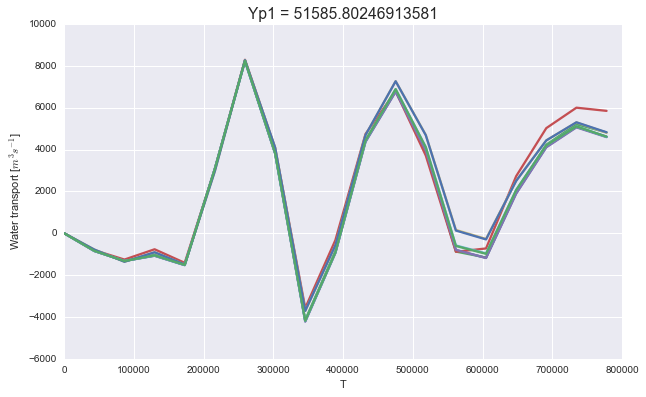

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

(waterCS1_flux03*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS1-03')
(waterCS1_flux11*grid.drF).sum(dim='Z').plot(ax=ax, label = '11')
(waterCS1_flux12*grid.drF).sum(dim='Z').plot(ax=ax, label = '12')
(waterCS1_flux17*grid.drF).sum(dim='Z').plot(ax=ax, label = '17')
(waterCS1_flux3D04*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04') 
(waterCS1_flux3D05*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05') 
(waterCS1_flux3D06*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06') 
(waterCS1_flux3D07*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07') 


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


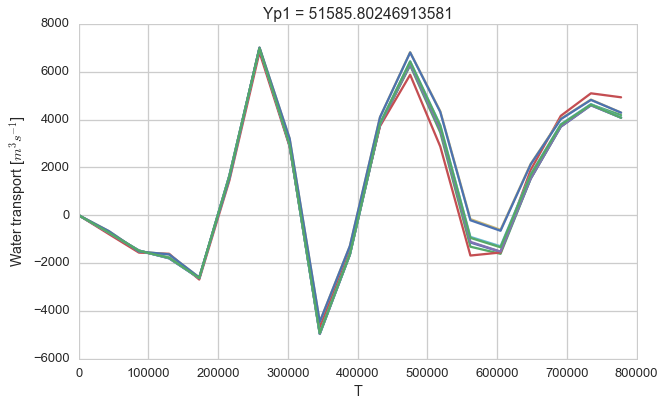

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

((waterCS1_flux03-waterCS1_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS1:03-07')
((waterCS1_flux11-waterCS1_flux24)*grid.drF).sum(dim='Z').plot(ax=ax, label = '11-24')
((waterCS1_flux12-waterCS1_flux25)*grid.drF).sum(dim='Z').plot(ax=ax, label = '12-25')
((waterCS1_flux17-waterCS1_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '17-30')
((waterCS1_flux3D04-waterCS1_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04-30') 
((waterCS1_flux3D05-waterCS1_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05-30') 
((waterCS1_flux3D06-waterCS1_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06-07') 
((waterCS1_flux3D07-waterCS1_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07-07') 


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


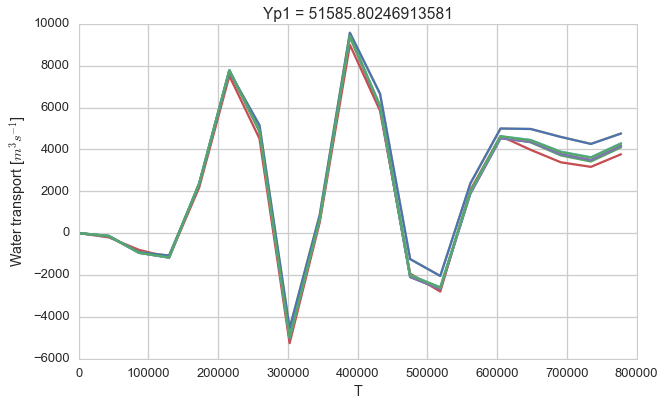

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

(waterCS2_flux03*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS2-03')
(waterCS2_flux11*grid.drF).sum(dim='Z').plot(ax=ax, label = '11')
(waterCS2_flux12*grid.drF).sum(dim='Z').plot(ax=ax, label = '12')
(waterCS2_flux17*grid.drF).sum(dim='Z').plot(ax=ax, label = '17')
(waterCS2_flux3D04*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04') 
(waterCS2_flux3D05*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05') 
(waterCS2_flux3D06*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06') 
(waterCS2_flux3D07*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07') 



/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


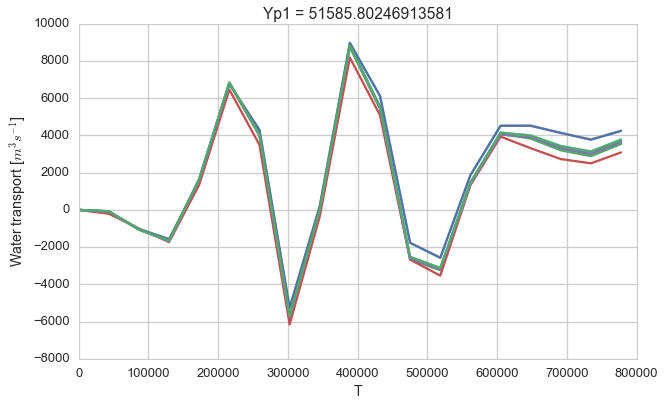

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

((waterCS2_flux03-waterCS2_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS2:03-07')
((waterCS2_flux11-waterCS2_flux24)*grid.drF).sum(dim='Z').plot(ax=ax, label = '11-24')
((waterCS2_flux12-waterCS2_flux25)*grid.drF).sum(dim='Z').plot(ax=ax, label = '12-25')
((waterCS2_flux17-waterCS2_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '17-30')
((waterCS2_flux3D04-waterCS2_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04-30') 
((waterCS2_flux3D05-waterCS2_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05-30') 
((waterCS2_flux3D06-waterCS2_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06-07') 
((waterCS2_flux3D07-waterCS2_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07-07') 


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


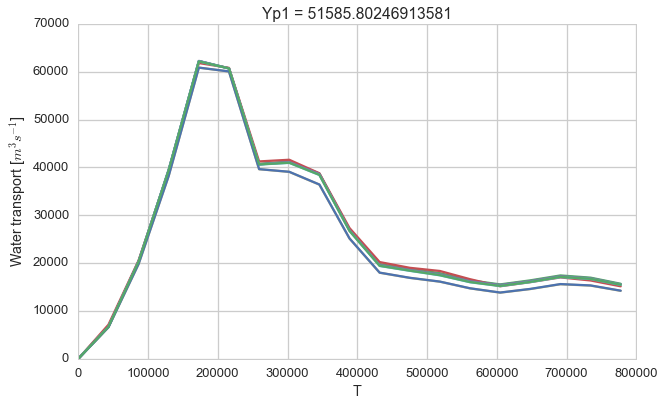

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

(waterCS3_flux03*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS3-03')
(waterCS3_flux11*grid.drF).sum(dim='Z').plot(ax=ax, label = '11')
(waterCS3_flux12*grid.drF).sum(dim='Z').plot(ax=ax, label = '12')
(waterCS3_flux17*grid.drF).sum(dim='Z').plot(ax=ax, label = '17')
(waterCS3_flux3D04*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04') 
(waterCS3_flux3D05*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05') 
(waterCS3_flux3D06*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06') 
(waterCS3_flux3D07*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07') 




/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


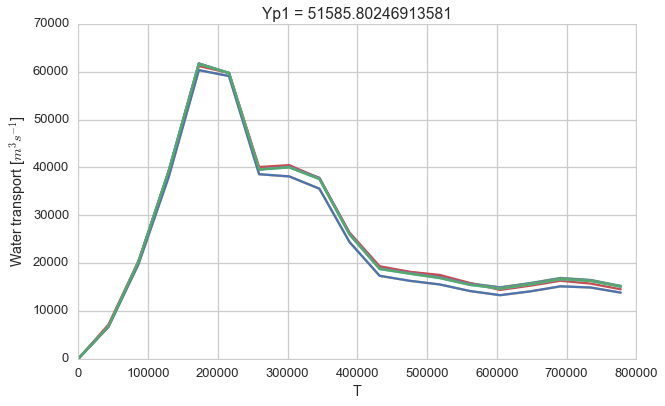

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

((waterCS3_flux03-waterCS3_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS3:03-07')
((waterCS3_flux11-waterCS3_flux24)*grid.drF).sum(dim='Z').plot(ax=ax, label = '11-24')
((waterCS3_flux12-waterCS3_flux25)*grid.drF).sum(dim='Z').plot(ax=ax, label = '12-25')
((waterCS3_flux17-waterCS3_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '17-30')
((waterCS3_flux3D04-waterCS3_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04-30') 
((waterCS3_flux3D05-waterCS3_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05-30') 
((waterCS3_flux3D06-waterCS3_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06-07') 
((waterCS3_flux3D07-waterCS3_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07-07') 


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


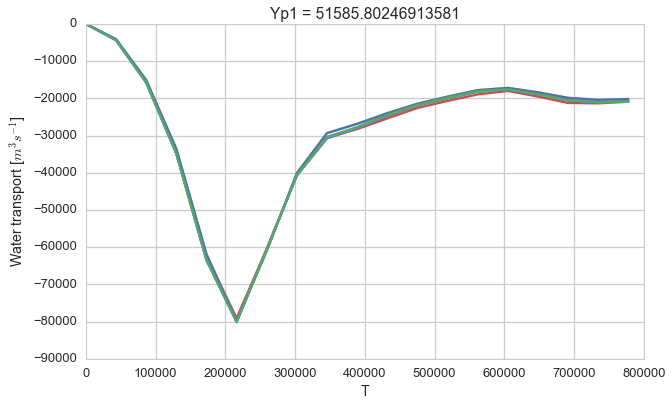

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

(waterCS4_flux03*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS4-03')
(waterCS4_flux11*grid.drF).sum(dim='Z').plot(ax=ax, label = '11')
(waterCS4_flux12*grid.drF).sum(dim='Z').plot(ax=ax, label = '12')
(waterCS4_flux17*grid.drF).sum(dim='Z').plot(ax=ax, label = '17')
(waterCS4_flux3D04*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04') 
(waterCS4_flux3D05*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05') 
(waterCS4_flux3D06*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06') 
(waterCS4_flux3D07*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07') 



/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


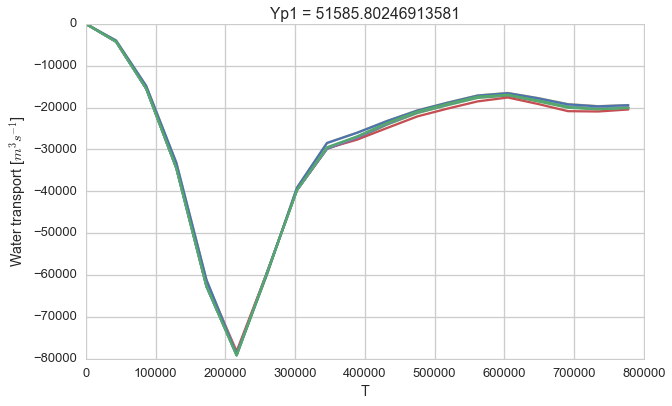

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

((waterCS4_flux03-waterCS4_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS4:03-07')
((waterCS4_flux11-waterCS4_flux24)*grid.drF).sum(dim='Z').plot(ax=ax, label = '11-24')
((waterCS4_flux12-waterCS4_flux25)*grid.drF).sum(dim='Z').plot(ax=ax, label = '12-25')
((waterCS4_flux17-waterCS4_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '17-30')
((waterCS4_flux3D04-waterCS4_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04-30') 
((waterCS4_flux3D05-waterCS4_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05-30') 
((waterCS4_flux3D06-waterCS4_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06-07') 
((waterCS4_flux3D07-waterCS4_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07-07') 


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


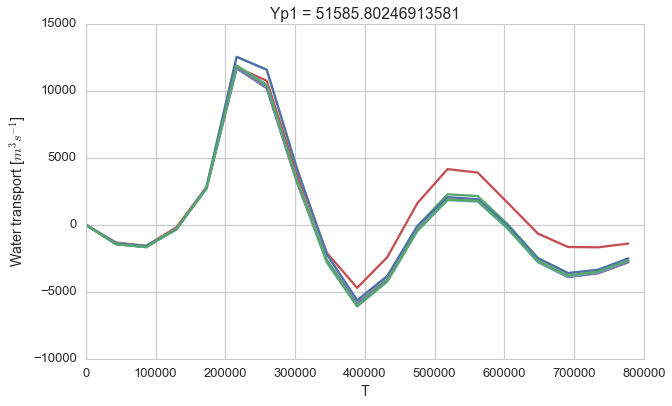

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

(waterCS5_flux03*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS5-03')
(waterCS5_flux11*grid.drF).sum(dim='Z').plot(ax=ax, label = '11')
(waterCS5_flux12*grid.drF).sum(dim='Z').plot(ax=ax, label = '12')
(waterCS5_flux17*grid.drF).sum(dim='Z').plot(ax=ax, label = '17')
(waterCS5_flux3D04*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04') 
(waterCS5_flux3D05*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05') 
(waterCS5_flux3D06*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06') 
(waterCS5_flux3D07*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07') 



/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


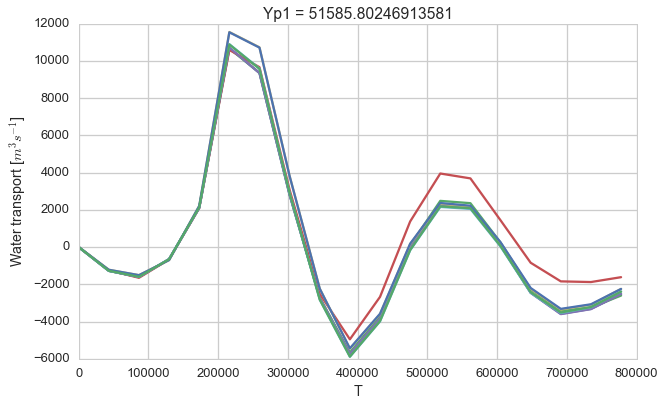

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax = fig_looks(ax)

((waterCS5_flux03-waterCS5_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = 'CS5:03-07')
((waterCS5_flux11-waterCS5_flux24)*grid.drF).sum(dim='Z').plot(ax=ax, label = '11-24')
((waterCS5_flux12-waterCS5_flux25)*grid.drF).sum(dim='Z').plot(ax=ax, label = '12-25')
((waterCS5_flux17-waterCS5_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '17-30')
((waterCS5_flux3D04-waterCS5_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04-30') 
((waterCS5_flux3D05-waterCS5_flux30)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05-30') 
((waterCS5_flux3D06-waterCS5_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06-07') 
((waterCS5_flux3D07-waterCS5_flux07)*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07-07') 


## Alongshore transports

In [19]:
waterAS1_flux03 = calc_wat_transport_AS(unstagger_xarray(state03.U,'Xp1'), AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux03 = calc_wat_transport_AS(unstagger_xarray(state03.U,'Xp1'), AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux03 = calc_wat_transport_AS(unstagger_xarray(state03.U,'Xp1'), AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux11 = calc_wat_transport_AS(unstagger_xarray(state11.U,'Xp1'), AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux11 = calc_wat_transport_AS(unstagger_xarray(state11.U,'Xp1'), AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux11 = calc_wat_transport_AS(unstagger_xarray(state11.U,'Xp1'), AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux12= calc_wat_transport_AS(unstagger_xarray(state12.U,'Xp1'), AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux12= calc_wat_transport_AS(unstagger_xarray(state12.U,'Xp1'), AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux12= calc_wat_transport_AS(unstagger_xarray(state12.U,'Xp1'), AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux17 = calc_wat_transport_AS(unstagger_xarray(state17.U,'Xp1'), AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux17 = calc_wat_transport_AS(unstagger_xarray(state17.U,'Xp1'), AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux17 = calc_wat_transport_AS(unstagger_xarray(state17.U,'Xp1'), AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux3D04 = calc_wat_transport_AS(unstagger_xarray(state3D04.U,'Xp1'), AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux3D04 = calc_wat_transport_AS(unstagger_xarray(state3D04.U,'Xp1'), AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux3D04 = calc_wat_transport_AS(unstagger_xarray(state3D04.U,'Xp1'), AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux3D05 = calc_wat_transport_AS(unstagger_xarray(state3D05.U,'Xp1'), AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux3D05 = calc_wat_transport_AS(unstagger_xarray(state3D05.U,'Xp1'), AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux3D05 = calc_wat_transport_AS(unstagger_xarray(state3D05.U,'Xp1'), AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux3D06 = calc_wat_transport_AS(unstagger_xarray(state3D06.U,'Xp1'), AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux3D06 = calc_wat_transport_AS(unstagger_xarray(state3D06.U,'Xp1'), AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux3D06 = calc_wat_transport_AS(unstagger_xarray(state3D06.U,'Xp1'), AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux3D07 = calc_wat_transport_AS(unstagger_xarray(state3D07.U,'Xp1'), AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux3D07 = calc_wat_transport_AS(unstagger_xarray(state3D07.U,'Xp1'), AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux3D07 = calc_wat_transport_AS(unstagger_xarray(state3D07.U,'Xp1'), AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')



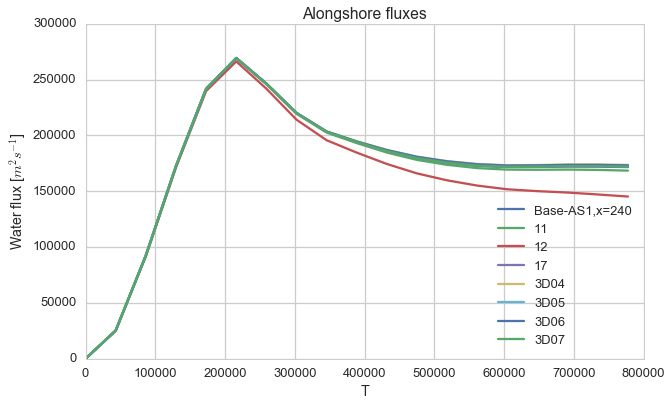

In [20]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

(waterAS1_flux03*grid.drF).sum(dim='Z').plot(ax=ax, label = 'Base-AS1,x=240')
(waterAS1_flux11*grid.drF).sum(dim='Z').plot(ax=ax, label = '11')
(waterAS1_flux12*grid.drF).sum(dim='Z').plot(ax=ax, label = '12')
(waterAS1_flux17*grid.drF).sum(dim='Z').plot(ax=ax, label = '17')
(waterAS1_flux3D04*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04')
(waterAS1_flux3D05*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05')
(waterAS1_flux3D06*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06')
(waterAS1_flux3D07*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')

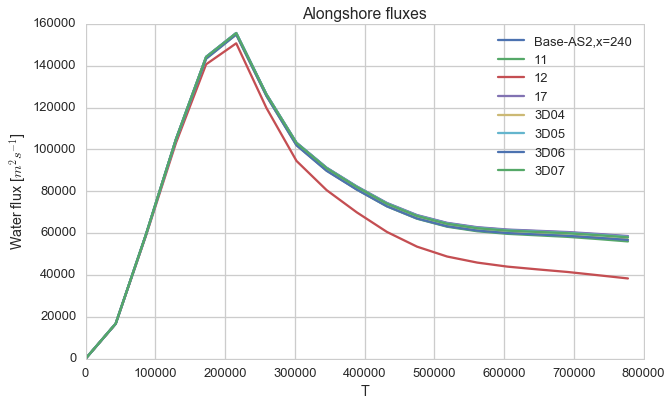

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

(waterAS2_flux03*grid.drF).sum(dim='Z').plot(ax=ax, label = 'Base-AS2,x=240')
(waterAS2_flux11*grid.drF).sum(dim='Z').plot(ax=ax, label = '11')
(waterAS2_flux12*grid.drF).sum(dim='Z').plot(ax=ax, label = '12')
(waterAS2_flux17*grid.drF).sum(dim='Z').plot(ax=ax, label = '17')
(waterAS2_flux3D04*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04')
(waterAS2_flux3D05*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05')
(waterAS2_flux3D06*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06')
(waterAS2_flux3D07*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')

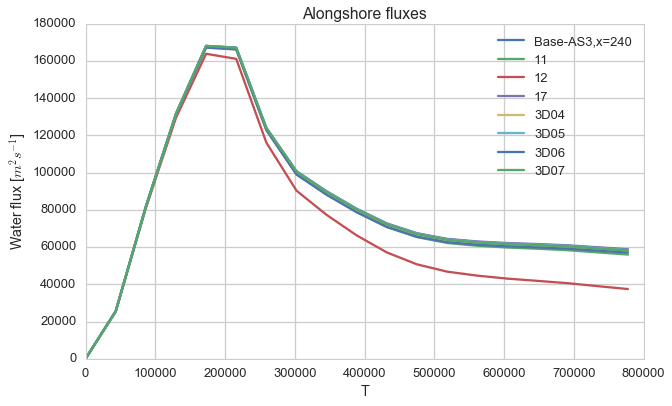

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

(waterAS3_flux03*grid.drF).sum(dim='Z').plot(ax=ax, label = 'Base-AS3,x=240')
(waterAS3_flux11*grid.drF).sum(dim='Z').plot(ax=ax, label = '11')
(waterAS3_flux12*grid.drF).sum(dim='Z').plot(ax=ax, label = '12')
(waterAS3_flux17*grid.drF).sum(dim='Z').plot(ax=ax, label = '17')
(waterAS3_flux3D04*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D04')
(waterAS3_flux3D05*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D05')
(waterAS3_flux3D06*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D06')
(waterAS3_flux3D07*grid.drF).sum(dim='Z').plot(ax=ax, label = '3D07')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')